# SA Languages Classification Hackathon

© Explore Data Science Academy

---
### Honour Code

I {**COLETTE MUIRURI**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>

## Table of Contents
<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Packages</a>


<br><br><br>
<a href=#x>X. Model</a>

 <a id="one"></a>
## 1. Introduction
<a href=#cont>Back to Table of Contents</a>

### Goal

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.


### Dataset Description

Classification Hackathon
Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.




**The files provided**

**train.csv** - You will use this data to train your model.

**test.csv** - You will use this data to test your model.

**SampleSubmission.csv** - is an example of what your submission file should look like. The order of the rows does not matter, but the names of the tweetid's must be correct.



 <a id="two"></a>
## 2. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [25]:
! pip install nlppreprocess

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [26]:
import re
import string

import pandas as pd
import numpy as np

from nlppreprocess import NLP
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<a id="three"></a>
## 3. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [27]:
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')

In [28]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5682 entries, 0 to 5681
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   5682 non-null   int64 
 1   text    5682 non-null   object
dtypes: int64(1), object(1)
memory usage: 88.9+ KB


In [31]:
df_train.shape

(33000, 2)

In [32]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [33]:
df_test.shape

(5682, 2)

In [34]:
df_test.dtypes

index     int64
text     object
dtype: object

In [35]:
df_test.isnull().sum()

index    0
text     0
dtype: int64

In [36]:
df_train.isnull().sum()

lang_id    0
text       0
dtype: int64

In [37]:
df_train.dtypes

lang_id    object
text       object
dtype: object

In [38]:
df_train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

The above code cells show that there are 33000 sample entries in the training dataset and two columns. The two columns have two different datatypes, the int64 and object datatypes. This dataset also has no missing values.

The test dataset contains 5682 entries and two columns. It does not have any missing values either and has the object datatype for both columns.


There are 11 unique values in the df_train dataset which represent the languge ids present in the training data

## Exploratory Data Analysis

This section analyzes the data present within the two datasets in order to get a better understanding of how to execute the goals of the assigned task

In [39]:
df_test.describe(include = 'all')

,index,text
count,5682.000000,5682
unique,NaN,5459
top,NaN,Hoekom moet Onderhoud Betaal word?
freq,NaN,6
mean,2841.500000,NaN
std,1640.396446,NaN
min,1.000000,NaN
25%,1421.250000,NaN
50%,2841.500000,NaN
75%,4261.750000,NaN


In [40]:
df_train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu...
freq,3000,17


The above shows there are duplicate values in the text column

In [41]:
df_train.lang_id.value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

In [42]:
#checking for duplicate data
df_train.text.duplicated(keep = "first").value_counts()

False    29948
True      3052
Name: text, dtype: int64

In [43]:
df_test.text.duplicated(keep = "first").value_counts()

False    5459
True      223
Name: text, dtype: int64

The dataset contains duplicate data. 3053 duplicate entries in the df_train and 223 duplicates in the df_test

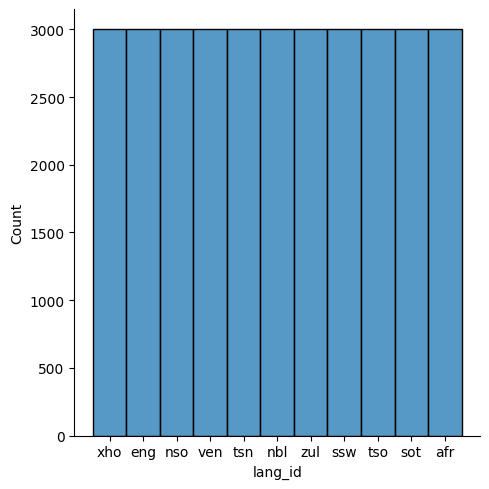

In [44]:
import seaborn as sns
sns.displot(data = df_train, x='lang_id')

In [45]:
#to remove the duplicate columns
df_train.drop_duplicates(inplace = True)

In [46]:
df_test.drop_duplicates(inplace = True)

In [47]:
df_train.columns

Index(['lang_id', 'text'], dtype='object')

In [48]:
#Removing punctuations; The function returns a clean string with punctuations removed
def clean_up(x):

    x = re.sub(r'[-]', ' ', x)
    x = re.sub(r'[_]', ' ', x)
    x = re.sub(r'[^\w\s]', '', x)
    x = re.sub('[0-9]+', '', x)
    x = re.sub(r'[^\x00-\x7f]', '', x)
    return x
#let's apply the functions to the text columns of both the train and test data set
#A new column of the cleaned text has been created
df_train['clean text'] = df_train['text'].apply(clean_up)
df_test['clean text'] = df_test['text'].apply(clean_up)

In [49]:
#convert the string(text) to lower
def _lower(x):
    return x.lower()
df_train['lower'] = df_train['clean text'].apply(_lower)
df_test['lower'] = df_test['clean text'].apply(_lower)

In [50]:
#removing the stopwords
nlp = NLP()
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(clean_text):
    stopwords = NLP(replace_words=True, remove_stopwords=True, remove_numbers=True, remove_punctuations=False)
    clean_text = stopwords.process(clean_text)
    return clean_text

In [51]:
df_train['no stop words'] = df_train['clean text'].apply(lambda clean_text: remove_stopwords(clean_text))
df_test['no stop words'] = df_test['clean text'].apply(lambda clean_text: remove_stopwords(clean_text))

In [52]:
df_train.head()

,lang_id,text,clean text,lower,no stop words
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...,dha iya kuba nobulumko bokubeka umsebenzi naph...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...,the province of kwazulu natal department of tr...,province kwazulu natal department transport in...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefata gore o ba file dilo ka moka te le d...,o netefata gore o ba file dilo ka moka te le d...,o netefata gore o ba file dilo ka moka te le d...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...


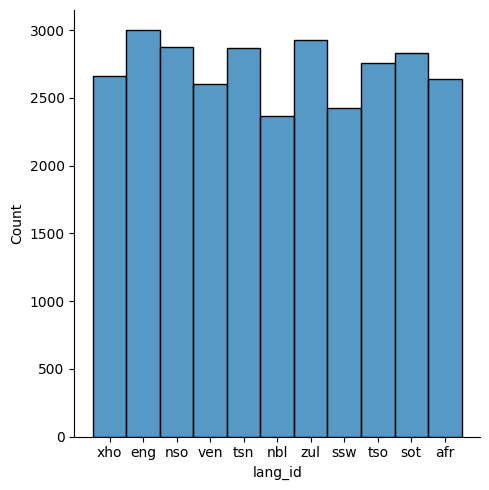

In [53]:
import seaborn as sns
sns.displot(data = df_train, x='lang_id')

In [54]:
X = df_train['no stop words']
y = df_train['lang_id']

In [55]:
#spliting into the train data set for training and validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
models = [LogisticRegression(random_state =42, max_iter=5000),
          MultinomialNB(),
          LinearSVC(random_state=42),
          SGDClassifier(random_state=42),
          RidgeClassifier(random_state=42)]

In [57]:
def performace_assesment(*args , **kwargs):
    model_stats = {}
    for clf in models:
        model = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(1, 5), analyzer= 'char')),
                      ('clf' , clf)
                      ])

        model.fit(X_train, y_train) #Training
        model_pred = model.predict(X_test) #Testing

    # Dictionary of Models Performances
        model_stats[clf.__class__.__name__] = {
        'F1-Macro':metrics.f1_score(y_test, model_pred, average='macro'),
        'F1-Accuracy':metrics.f1_score(y_test, model_pred, average='micro'),
        'F1-Weighted':metrics.f1_score(y_test, model_pred, average='weighted')}
    return pd.DataFrame.from_dict(model_stats, orient='index')

In [58]:
performance = performace_assesment(models , X_train , X_test , y_train , y_test)
performance.to_csv('performance.csv')
dataframe = pd.read_csv('performance.csv', index_col = 0)
dataframe.sort_values('F1-Weighted', ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


,F1-Macro,F1-Accuracy,F1-Weighted
RidgeClassifier,0.999020,0.998998,0.998999
SGDClassifier,0.998676,0.998664,0.998664
LinearSVC,0.998685,0.998664,0.998664
LogisticRegression,0.997683,0.997663,0.997663
MultinomialNB,0.996457,0.996494,0.996495


In [59]:
def param_tuning(*args , **kwargs):

    best_params = {}

    for clf in models:
        model = Pipeline([('tfidf', TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(1, 5), analyzer= 'char')),
                      ('clf' , clf)])
        model.fit(X_train, y_train) #Training

    #Get models performing parameters
        params = model.get_params()
        model_name = clf.__class__.__name__
        model_name = {}
        for key in params:

            if key.startswith("clf"):
                if len(key) < 5:
                    model_name['model'] = params[key]
                else:
                    model_name[key[5:]] = params[key]
        best_params[clf.__class__.__name__] = model_name
    return best_params

In [60]:
best_params = param_tuning(models, X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [61]:
model1 = MultinomialNB()

In [62]:
Vectorize = TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(1, 5), analyzer= 'char')
X_train = Vectorize.fit_transform(X_train)
X_test = Vectorize.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [63]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True,
                                   random_state=42)

In [64]:
best_params[models[1].__class__.__name__]

{'model': MultinomialNB(),
 'alpha': 1.0,
 'class_prior': None,
 'fit_prior': True,
 'force_alpha': 'warn'}

In [65]:
alpha = list(np.linspace(0.1,0.02,4))
param_grid = dict(alpha=alpha)
grid_search = GridSearchCV(estimator= model1,
                           param_grid=param_grid,
                           scoring='f1_weighted',
                           cv=stratified_kfold,
                           error_score=0,
                           n_jobs=-1)

In [66]:
grid_search.fit(X_train, y_train)
prediction = grid_search.predict(X_test)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

In [67]:
print(f'Cross-validation score: {cv_score}')
print(f'Test score: {test_score}')
grid_search.best_params_
grid_search.best_estimator_

Cross-validation score: 0.9996661109294651
Test score: 0.9994992771622028


MultinomialNB(alpha=0.07333333333333333)

In [68]:
model2 = RidgeClassifier()

In [69]:
best_params[models[4].__class__.__name__]

{'model': RidgeClassifier(random_state=42),
 'alpha': 1.0,
 'class_weight': None,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': 42,
 'solver': 'auto',
 'tol': 0.0001}

In [70]:
alpha = list(np.linspace(0.15,0.4, 5))
param_grid = dict(alpha=alpha)
grid_search = GridSearchCV(estimator= model2,
                           param_grid=param_grid,
                           scoring='f1_weighted',
                           cv=stratified_kfold,
                           error_score=0,
                           n_jobs=-1)

In [72]:
grid_search.fit(X_train, y_train)
prediction = grid_search.predict(X_test)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)

KeyboardInterrupt: ignored

In [ ]:
print(f'Cross-validation score: {cv_score}')
print(f'Test score: {test_score}')
grid_search.best_params_
grid_search.best_estimator_

In [73]:
X_train , X_test , y_train , y_test = train_test_split(X, y,  stratify=y, test_size=0.4, random_state =1)

In [74]:
vect = TfidfVectorizer(stop_words = 'english', max_df=0.9, ngram_range=(2, 6), analyzer= 'char')
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:550: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


In [75]:
multiNB1 = MultinomialNB(alpha=0.1)
multiNB2 = MultinomialNB(alpha=0.1)

estimators = [('multiNB1', multiNB1), ('multiNB2', multiNB2)]
final_est = RidgeClassifier(alpha=0.2125)

In [76]:
stacking_NB2 = StackingClassifier(estimators = estimators,
                           final_estimator = final_est,
                           passthrough = True)

In [77]:
stacking_NB2.fit(X_train , y_train)

StackingClassifier(estimators=[('multiNB1', MultinomialNB(alpha=0.1)),
                               ('multiNB2', MultinomialNB(alpha=0.1))],
                   final_estimator=RidgeClassifier(alpha=0.2125),
                   passthrough=True)

In [78]:
pred = stacking_NB2.predict(X_test)

In [79]:
model_stats = {}
model_stats[stacking_NB2.__class__.__name__] = {
        'F1-Macro':metrics.f1_score(y_test, pred, average='macro'),
        'F1-Accuracy':metrics.f1_score(y_test, pred, average='micro'),
        'F1-Weighted':metrics.f1_score(y_test, pred, average='weighted')}
pd.DataFrame.from_dict(model_stats, orient='index')

,F1-Macro,F1-Accuracy,F1-Weighted
StackingClassifier,0.999322,0.999332,0.999332


In [80]:
count_vec = CountVectorizer(ngram_range=(3,7), analyzer= 'char')
X_train , X_test , y_train , y_test = train_test_split(X, y, stratify=y,test_size=0.05, random_state =1)
X_train = count_vec.fit_transform(X_train)
X_test = count_vec.transform(X_test)

In [81]:
X = df_test['no stop words']
Vectorize = vect.transform(X)

In [82]:
df_test['lang_id'] = stacking_NB2.predict(Vectorize)

In [83]:
submission = df_test[['index', 'lang_id']]
submission.to_csv('Output.csv',index=False)
submission

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot
